
# Exploratory Data Analysis 

<p align="center">
  <img src=img/branding-tdc.png" width="400"/></p>

---

Let's begin our exploration over the [ANP public data base](http://www.anp.gov.br/dados-estatisticos)!

The study that will follows are done (actually work in progress) by:

* **Diego T. Volpatto**: DSc. student, MSc., Numerical Developer.
* **Eduardo Bürgel**:  MSc., Software Developer.

We working for [Engineering Simulation and Scientific Software](https://www.esss.co/), a multinational company lead at creation and customization of engineering simulation software.

<p align="center">
  <img src=img/esss_2_pos_RGB.jpg" width="400"/></p>

By the way:

* We are doing the present analysis in our free time (not related to our job)


* ESSS is hiring. If you have interest, come talk to me after the presentation!

## What we want to do?

* We want to answer some questions! But ANP did it already, but not entirely!

* The better way to telling a story is throught the data. Better saying, doing an Exploratory Data Analysis! Putting it simple, it means know your data and potential parts at best.

* From the data, what kind of study we can employ? Is it worthy? What we can retrieve from the data?

## Brazilian Petroleum data

* The data base provided by ANP is open, but treats only a general vision

* In portuguese, we like to say: "Dados nunca são dados"!

* Also, data gives to us knowledge (Yes, POWER!)

* We want to explore the petroleum data within an integrated framework:
    - Geospatial visualization
    - Data Analysis
    
* This kind of view is NATURAL in Petroleum workflow.

## What we will need?!

* Data base: ANP website

* Data Analysis tool: pandas

* Maps: Folium

* Visualization libs: Matplotlib, Seaborn and Altair

* Handling with geospatial data: Geopandas

All Open Source and Free, waiting you to pick up them!

# Agenda

* Introduction:
    - A short overview of how to handle Excel files (common in companies over the world) with pandas
    - How to construct maps with 4 lines of codes
    
* A more significative application: Pre-salt data:
    - We will draw a cool map
    - Plot significant data in the map
    - At last, a glimpse in most interesting data to Petroleum Engineers

# An Overview: Introduction

Opening an Excel file is pretty simple!

In [1]:
import pandas as pd

dfs = pd.read_excel('../data/tabela_de_pocos_abril_2018.xlsx', sheet_name='Plan1')

Now we fill a data field which we may need

In [2]:
dfs['TESTE_DE_FORMACAO'].fillna(value='Desconhecido', inplace=True)

### Looking for a specific field: Albacora Leste

Let's get data from Albacora Leste field. The data must be:

* Campo: Albacora Leste
* Tipo: Explotatório
* Categoria: Devenvolvimento

Before looking for some data gathering and filtering, I will define some auxiliary functions.

In [3]:
def write_xlsx(file_name, dfs, sheetname='Plan1'):
    """
    Writes a data frame dfs in the file 'file_name.xlsx' with sheet name as 'sheetname'
    """ 
    #... Criando os arquivos excel
    writer = pd.ExcelWriter('%s.xlsx' % file_name)
    #... Convertendo o DataFrame para xlsx
    dfs.to_excel(writer,sheet_name=sheetname,index=False)
    #... Escrevendo os arquivos
    writer.save()
    
    
def write_reduced_xlsx(
    file_name,
    dfs,
    columns_fmt=['POCO','CADASTRO,CAMPO','SITUACAO','CATEGORIA'],
    sheetname='Plan1'
):
    """
    Write, in a reduced fashion, the data frame 'dfs' in a file named file_name.xlsx with sheet name as 'sheetname'.
    The reduced format is given by 'columns_fmt'.
    """ 
    dfs_reduced = dfs[columns_fmt]
    writer_reduced = pd.ExcelWriter('%s.xlsx' % file_name)
    dfs_reduced.to_excel(writer_reduced, sheet_name=sheetname, index=False)
    writer_reduced.save()

In [4]:
%%time
nome_campo = 'ALBACORA LESTE'
filter1 = dfs['CAMPO']==nome_campo
filter1 &= dfs['TIPO']==u'Explotatório'
filter1 &= dfs['CATEGORIA']=='Desenvolvimento'
candidatos = dfs[filter1]
colunas_principais = ['CAMPO', 'SITUACAO', 'CATEGORIA', 'RECLASSIFICACAO', 'TESTE_DE_FORMACAO']

#... Escrevendo os pocos candidatos possíveis

principais_cols = ['POCO','CADASTRO','OPERADOR','ESTADO','BACIA','CAMPO','TERRA_MAR','SITUACAO','CATEGORIA', 'RECLASSIFICACAO', 'TESTE_DE_FORMACAO','PROFUNDIDADE_MEDIDA_M','DIRECAO','TESTEMUNHO']
write_xlsx('../out/pocos_ABL', candidatos)
write_reduced_xlsx('../out/pocos_ABL_resumido', candidatos, principais_cols)

CPU times: user 239 ms, sys: 3.99 ms, total: 243 ms
Wall time: 247 ms


Now, suppose we need the producting wells. So, I will filter them. But we need some functions before, provided below:

In [5]:
def get_produtors(dfs, field_name):
    '''
    Filters producting wells in a field
    '''
    productor = dfs[(dfs['CAMPO']==field_name) & (dfs['TIPO']==u'Explotatório') & (dfs['SITUACAO']=='PRODUZINDO') & \
            (dfs['CATEGORIA']=='Desenvolvimento') & (dfs['RECLASSIFICACAO']==u'PRODUTOR COMERCIAL DE PETRÓLEO')]
    productor.reset_index(inplace=True)
    return productor

Or the injection wells:

In [6]:
def get_injections(dfs, field_name):
    '''
    Filters the injection wells in a field
    '''
    injector = dfs[(dfs['CAMPO']==field_name) & (dfs['TIPO']==u'Explotatório') & (dfs['SITUACAO']=='INJETANDO') & \
            (dfs['CATEGORIA']==u'Injeção') & (dfs['RECLASSIFICACAO']==u'INJEÇÃO DE ÁGUA')]
    injector.reset_index(inplace=True)
    return injector


Now, we can get those guys:

In [7]:
%%time
nome_campo = 'ALBACORA LESTE'
produtor = get_produtors(dfs, nome_campo)

#... Escrevendo os pocos produtores possíveis

principais_cols = ['POCO','CADASTRO','BACIA','CAMPO','TERRA_MAR','SITUACAO','CATEGORIA','RECLASSIFICACAO', 'LATITUDE_BASE_DD', 'LONGITUDE_BASE_DD','PROFUNDIDADE_MEDIDA_M','DIRECAO']
write_xlsx('../out/pocos_produtores_ABL', produtor)
write_reduced_xlsx('../out/pocos_produtores_resumido_ABL',produtor, principais_cols)

#... Filtrando um poço injetor nas condições adequadas de produção

injetor = get_injections(dfs, nome_campo)

#... Escrevendo os pocos produtores possíveis

write_xlsx('../out/pocos_injetores_ABL', injetor)
write_reduced_xlsx('../out/pocos_injetores_resumido_ABL', injetor, principais_cols)

CPU times: user 135 ms, sys: 4.04 ms, total: 139 ms
Wall time: 138 ms


## Let's draw some maps?

Do you know [Folium?](https://github.com/python-visualization/folium) It's a very good Python lib which bring to us
the Leaflet.js in our beloved programming language.

Best of JS with pleasure from Python! The main maintainer is brazilian!

Let's take a look...

In [8]:
import folium

Providing the coordinates and the zoom factor, we can plot a map within 4 lines!

In [9]:
def create_folium_map(lat, lot, zfact):
    '''
    Cria um objeto Folium.Map do tipo OpenStreetMap centrado em (lat,lot) com nível de zoom zfact
    '''
    import folium
    tiles = 'http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{y}/{x}'
    attr = ('Tiles &copy; Esri &mdash; Sources: GEBCO, NOAA, CHS, OSU, UNH, CSUMB, National Geographic, DeLorme, NAVTEQ, and Esri')
    m = folium.Map(location=[lat,lot], 
            tiles=tiles,
            attr=attr,
            zoom_start=zfact)
    return m

In [10]:
m = create_folium_map(-22.0,-40.0,8)
m

I want to add some wells at my map. So let's create a function to this duty.

In [11]:
def add_pocos_mapa(mapa, pocos, cor, kind=1, nome_grupo=u'default'):
    if kind != 1 and kind != 2:
        print("Erro: Tipo de marcação no mapa indisponível!")
        return False
    else:
        pocos_len = pocos.shape[0]
        grupo = folium.FeatureGroup(nome_grupo)
        for i in range(pocos_len):
            lat, lont = float(pocos['LATITUDE_BASE_DD'][i].replace(",",".")), float(pocos['LONGITUDE_BASE_DD'][i].replace(",","."))
            if kind==1:
                folium.Marker(
                    location=[lat, lont],
                    popup=pocos['POCO'][i],
                    icon=folium.Icon(color=cor),
                    ).add_to(grupo)
            if kind==2:
                folium.Circle(
                    location=[lat, lont],
                    popup=pocos['POCO'][i],
                    radius=15,
                    color='red',
                    fill=True,
                    fill_color='crimson'
                    ).add_to(grupo)
            grupo.add_to(mapa)

Now we put the guys right on the map!

Productors Wells

In [12]:
nome_campo = 'ALBACORA LESTE'
produtor = get_produtors(dfs, nome_campo)

add_pocos_mapa(
    m,
    produtor,
    'red',
    nome_grupo=(produtor['CAMPO'][0]+" ("+produtor['SITUACAO'][0]+")")
)

Injection Wells

In [13]:
injetor = get_injections(dfs, nome_campo)

add_pocos_mapa(
    m, 
    injetor,
    'blue',
    nome_grupo=(injetor['CAMPO'][0]+" ("+injetor['SITUACAO'][0]+")")
)

In [14]:
m

## Folium and Geopandas

What if we can use geospatial data such as shp files? [Geopandas](http://geopandas.org/) extends pandas capability to incorporate geospatial data to allow spatial operations over geometric types.

In [15]:
import geopandas as gp

Without dive-in in details, let's see how it works.

The function below adds multiples shp components over a provided map:

In [16]:
def add_multi_shp(mapa, nome_shp, cor='ffff00'):
    fp = '%s.shp' % nome_shp
    data = gp.read_file(fp)
    data_range = data.shape[0]
    for i in range(data_range):
        shp_plot = folium.GeoJson(
                data.iloc[i:i+1],
                name=(u'Campo: %s' %  data['NOM_CAMPO'][i].lower()), 
                style_function=lambda feature: {
                    'fillColor': cor,
                    'color': 'black',
                    'weight': 2,
                    'dashArray': '5, 5'
                }
        )
        label = '%s' % data['NOM_CAMPO'][i]
        folium.Popup(label).add_to(shp_plot)
        shp_plot.add_to(mapa)

Now we can add ALL the data provided by ANP about geospatial coordinates of petroleum fields in our map:

In [17]:
m = create_folium_map(-22.0,-40.0,8)
add_multi_shp(m, '../Campos/Campos_de_Producao', cor='red')

m

### Enjoying our exploration so far?

Because the true exploration will begin right now!

# Pre-salt Data

* Brazil is a very rich country in natural resources, petroleum included. 

* We have a large amount of pre-salt in our territory

* Technology is been studied to improve pre-salt production

* Approximately half of our national production comes from Pre-salt

* Pre-salt is just in the beginning!

* Quite interesting! Let's take a look.

## Preprocessing pre-salt wells data

Preprocessing the pre-salt wells data files is the first step, but I will skip the details.

The data base file are `.xls` or `.xlsx`, two header's possibility to the similar informations. Check by yourself and enjoy multi-index pandas trip!

One can check this full notebook on my GitHub ([https://github.com/volpatto/anp-data-analysis](https://github.com/volpatto/anp-data-analysis)) for further details.

In [18]:
import numpy as np
import pandas as pd

from os import walk
from unicodedata import normalize

files = []
for (dirpath, dirnames, filenames) in walk('../data/producao-por-poco'):
    for filename in filenames:
        if filename.startswith('presal') or filename.endswith('presal.xls') or filename.endswith('presal.xlsx'):
            files.append('%s/%s' % (dirpath, filename))

wells = []
for file in sorted(files):
    excel_file = pd.read_excel(file)
    initial_column = excel_file.columns[0]

    period_value = None
    well_data = None
    production_data = None
    try:
        if initial_column.startswith('ANP - Agência Nacional do Petroleo'):
            data = pd.read_excel(file, skiprows=4, header=[0, 1], index_col=None)

            period = data.xs('Período', axis=1, level=0, drop_level=True).iloc[:, 0]
            period = period.dropna().unique()
            period = period[0].replace('/', '_')

            production_col = None
            field_col = None
            for column in data.columns:
                if column[0].startswith('Petróleo (bbl/dia)'):
                    production_col = column
                if column[0].startswith('Campo'):
                    field_col = column
            selected_data = data[[('Nome Poço', 'ANP'), field_col, production_col]]

            period_value = period
            well_data = selected_data[('Nome Poço', 'ANP')].values
            field_data = selected_data[field_col].values
            production_data = selected_data[production_col].values

        elif initial_column.startswith('COD_POCO') or initial_column.startswith('NOM_POCO_ANP'):
            data = pd.read_excel(file)

            period = data['PERIODO'].dropna().unique()
            period = period[0].replace('-', '_')

            selected_data = data[['NOM_POCO_ANP', 'NOM_CAMPO', 'OLEO_BBL_DIA']]

            well_data = pd.DataFrame(columns=['well', 'production_%s' % period])

            period_value = period
            well_data = data['NOM_POCO_ANP'].values
            field_data = data['NOM_CAMPO'].values
            production_data = data['OLEO_BBL_DIA'].values

    except Exception as exc:
        print('********** Exception **********', exc)

    well_df = pd.DataFrame(columns=['well', 'field', 'prod_%s' % period])
    well_df['well'] = well_data
    well_df['field'] = field_data
    well_df['prod_%s' % period] = pd.to_numeric(production_data)

    # Remove nan in well index.
    well_df = well_df.drop(well_df.loc[well_df.well.isnull()].index, axis=0)
    # Remove nan in field index.
    well_df = well_df.drop(well_df.loc[well_df.field.isnull()].index, axis=0)
    # Remove description index.
    well_df = well_df.drop(well_df.loc[well_df.well.map(len) > 50].index, axis=0)

    well_df.well = well_df.well.map(str.strip)
    well_df.well = well_df.well.map(str.lower)
    well_df.field = well_df.field.map(str.strip)
    well_df.field = well_df.field.map(str.lower)

    def normalize_str(input_str):
        return normalize('NFKD', input_str).encode('ascii', 'ignore').decode('utf-8')
    well_df.well = well_df.well.map(normalize_str)
    well_df.field = well_df.field.map(normalize_str)

    def replace_str(input_str):
        return input_str.replace(' ', '').replace('-', '')
    well_df.well = well_df.well.map(replace_str)
    well_df.field = well_df.field.map(replace_str)

    well_df['index'] = well_df.apply(lambda row: '%s_%s' % (row['well'], row['field']), axis=1)

    well_df = well_df.drop('well', axis=1)
    well_df = well_df.drop('field', axis=1)
    well_df = well_df.set_index('index')

    well_df = well_df[~well_df.index.duplicated(keep='first')]

    wells.append(well_df)

salt_df = pd.concat(wells, axis=1)
salt_df

/home/volps/miniconda3/envs/eda-anp/lib/python3.6/site-packages/ipykernel_launcher.py:98: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,prod_2016_01,prod_2016_02,prod_2016_03,prod_2016_04,prod_2016_05,prod_2016_06,prod_2016_07,prod_2016_08,prod_2016_09,prod_2016_10,...,prod_2017_11,prod_2017_12,prod_2018_01,prod_2018_02,prod_2018_03,prod_2018_04,prod_2018_05,prod_2018_06,prod_2018_07,prod_2018_08
1brsa108aess_jubarte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1brsa1116rjs_itapu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222.1723,NaN,0.0000,...,29251.1241,3033.0093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1brsa1146rjs_atapu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1brsa594sps_sapinhoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1brsa976rjs_sepia,NaN,4038.4289,NaN,NaN,16793.2997,19357.6807,17324.6283,19303.0414,421.0546,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2anp1rjs_buzios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3brsa1017drjs_marlimleste,3217.8084,940.7094,1039.1168,1645.0457,1578.5540,1555.8059,1554.5046,1668.1607,1594.7409,1728.0598,...,2677.8512,2858.4587,3107.4003,3024.9240,2992.8340,1745.1677,586.4773,711.2949,693.0370,504.9356
3brsa1053rjs_buzios,3444.0484,13159.8767,20.1903,NaN,3389.5847,NaN,NaN,NaN,NaN,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3brsa1054drjs_marlimleste,3089.7979,3020.2906,3049.9899,408.6213,NaN,NaN,NaN,NaN,NaN,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3brsa1064rjs_buzios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Take a look on the preprocessed pre-salt data below

In [19]:
salt_df

,prod_2016_01,prod_2016_02,prod_2016_03,prod_2016_04,prod_2016_05,prod_2016_06,prod_2016_07,prod_2016_08,prod_2016_09,prod_2016_10,...,prod_2017_11,prod_2017_12,prod_2018_01,prod_2018_02,prod_2018_03,prod_2018_04,prod_2018_05,prod_2018_06,prod_2018_07,prod_2018_08
1brsa108aess_jubarte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1brsa1116rjs_itapu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222.1723,NaN,0.0000,...,29251.1241,3033.0093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1brsa1146rjs_atapu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1brsa594sps_sapinhoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1brsa976rjs_sepia,NaN,4038.4289,NaN,NaN,16793.2997,19357.6807,17324.6283,19303.0414,421.0546,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2anp1rjs_buzios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3brsa1017drjs_marlimleste,3217.8084,940.7094,1039.1168,1645.0457,1578.5540,1555.8059,1554.5046,1668.1607,1594.7409,1728.0598,...,2677.8512,2858.4587,3107.4003,3024.9240,2992.8340,1745.1677,586.4773,711.2949,693.0370,504.9356
3brsa1053rjs_buzios,3444.0484,13159.8767,20.1903,NaN,3389.5847,NaN,NaN,NaN,NaN,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3brsa1054drjs_marlimleste,3089.7979,3020.2906,3049.9899,408.6213,NaN,NaN,NaN,NaN,NaN,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3brsa1064rjs_buzios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Geo Data

Preprocessing the geo data is quite similar, but the data is within a different set of files. Let's use one of this file, which provides geospatial's wells coordinates (all the wells, including pre-salt... but beware!).

In [20]:
import pandas as pd

from unicodedata import normalize

data = pd.read_excel('../data/tabela_de_pocos_abril_2018.xlsx')

In [21]:
geo_df = pd.DataFrame(columns=['well', 'field', 'lat_4c', 'lon_4c', 'lat_dd', 'lon_dd'])
geo_df['well'] = data['POCO']
geo_df['field'] = data['CAMPO']
geo_df['lat_4c'] = data['LATITUDE_BASE_4C']
geo_df['lon_4c'] = data['LONGITUDE_BASE_4C']
geo_df['lat_dd'] = data['LATITUDE_BASE_DD']
geo_df['lon_dd'] = data['LONGITUDE_BASE_DD']

# Remove nan in well index.
geo_df = geo_df.drop(geo_df.loc[geo_df.well.isnull()].index, axis=0)
# Remove nan in field index.
geo_df = geo_df.drop(geo_df.loc[geo_df.field.isnull()].index, axis=0)

geo_df.well = geo_df.well.map(str.strip)
geo_df.well = geo_df.well.map(str.lower)
geo_df.field = geo_df.field.map(str.strip)
geo_df.field = geo_df.field.map(str.lower)

def normalize_str(input_str):
    return normalize('NFKD', input_str).encode('ascii', 'ignore').decode('utf-8')
geo_df.well = geo_df.well.map(normalize_str)
geo_df.field = geo_df.field.map(normalize_str)

def replace_str(input_str):
    return input_str.replace(' ', '').replace('-', '')
geo_df.well = geo_df.well.map(replace_str)
geo_df.field = geo_df.field.map(replace_str)

geo_df['index'] = geo_df.apply(lambda row: '%s_%s' % (row['well'], row['field']), axis=1)

geo_df = geo_df.drop('well', axis=1)
geo_df = geo_df.drop('field', axis=1)
geo_df = geo_df.set_index('index')

geo_df

,lat_4c,lon_4c,lat_dd,lon_dd
index,,,,
7sz514se_siririzinho,"-10:39:43,838","-37:05:51,689","-10,6621772222","-37,0976913888"
7jub14hess_jubarte,"-21:14:08,098","-40:01:42,932","-21,2355827777","-40,0285922222"
7mll44hprjs_marlimleste,"-22:26:39,475","-39:56:30,781","-22,4442986111","-39,9418836111"
9fr18dprjs_frade,"-21:53:27,749","-39:50:00,528","-21,8910413888","-39,83348"
7mrl202hrjs_marlim,"-22:24:25,011","-40:03:30,501","-22,4069475","-40,0584725"
7ba431dba_buracica,"-12:11:45,136","-38:29:34,024","-12,1958711111","-38,4927844444"
7fp398rn_fazendapocinho,"-05:13:59,069","-36:30:45,334","-5,2330747222","-36,5125927777"
7luc59hpam_lestedourucu,"-04:52:20,399","-65:06:40,581","-4,8723330555","-65,1112725"
7mgp92dba_miranga,"-12:20:29,345","-38:11:03,700","-12,3414847222","-38,1843611111"


Take a look in what we have:

In [22]:
geo_df

,lat_4c,lon_4c,lat_dd,lon_dd
index,,,,
7sz514se_siririzinho,"-10:39:43,838","-37:05:51,689","-10,6621772222","-37,0976913888"
7jub14hess_jubarte,"-21:14:08,098","-40:01:42,932","-21,2355827777","-40,0285922222"
7mll44hprjs_marlimleste,"-22:26:39,475","-39:56:30,781","-22,4442986111","-39,9418836111"
9fr18dprjs_frade,"-21:53:27,749","-39:50:00,528","-21,8910413888","-39,83348"
7mrl202hrjs_marlim,"-22:24:25,011","-40:03:30,501","-22,4069475","-40,0584725"
7ba431dba_buracica,"-12:11:45,136","-38:29:34,024","-12,1958711111","-38,4927844444"
7fp398rn_fazendapocinho,"-05:13:59,069","-36:30:45,334","-5,2330747222","-36,5125927777"
7luc59hpam_lestedourucu,"-04:52:20,399","-65:06:40,581","-4,8723330555","-65,1112725"
7mgp92dba_miranga,"-12:20:29,345","-38:11:03,700","-12,3414847222","-38,1843611111"


## Merge Data

Merging salt and geo data. The collision will retrieve only that is presented in both data bases.

In [23]:
merged_df = pd.concat([salt_df, geo_df], axis=1, join='inner')
merged_df

,prod_2016_01,prod_2016_02,prod_2016_03,prod_2016_04,prod_2016_05,prod_2016_06,prod_2016_07,prod_2016_08,prod_2016_09,prod_2016_10,...,prod_2018_03,prod_2018_04,prod_2018_05,prod_2018_06,prod_2018_07,prod_2018_08,lat_4c,lon_4c,lat_dd,lon_dd
1brsa108aess_jubarte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,"-21:16:23,421","-40:00:11,994","-21,2731725","-40,0033316666"
1brsa1116rjs_itapu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222.1723,NaN,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,"-24:48:06,173","-42:42:13,712","-24,8017147222","-42,7038088888"
1brsa1146rjs_atapu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,"-24:58:31,873","-42:26:18,323","-24,9755202777","-42,4384230555"
1brsa594sps_sapinhoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,"-25:48:23,679","-43:13:31,011","-25,8065775","-43,2252808333"
1brsa976rjs_sepia,NaN,4038.4289,NaN,NaN,16793.2997,19357.6807,17324.6283,19303.0414,421.0546,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,"-25:13:24,333","-42:31:25,561","-25,2234258333","-42,5237669444"
2anp1rjs_buzios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,"-24:37:47,228","-42:29:27,263","-24,6297855555","-42,4909063888"
3brsa1017drjs_marlimleste,3217.8084,940.7094,1039.1168,1645.0457,1578.5540,1555.8059,1554.5046,1668.1607,1594.7409,1728.0598,...,2992.8340,1745.1677,586.4773,711.2949,693.0370,504.9356,"-22:26:42,313","-39:57:13,187","-22,4450869444","-39,9536630555"
3brsa1053rjs_buzios,3444.0484,13159.8767,20.1903,NaN,3389.5847,NaN,NaN,NaN,NaN,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,"-24:47:08,864","-42:28:33,522","-24,7857955555","-42,4759783333"
3brsa1054drjs_marlimleste,3089.7979,3020.2906,3049.9899,408.6213,NaN,NaN,NaN,NaN,NaN,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,"-22:31:11,227","-39:55:13,746","-22,5197852777","-39,920485"
3brsa1064rjs_buzios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,"-24:41:42,544","-42:28:02,768","-24,6951511111","-42,4674355555"


# Visualization in a Folium Map

The details of building the map are skipped. In short words, is a function with a collection of option. We use Altair and its VegaLite integration to put some statistics' plot over the map.

Sounds interesting? Let's see the result!

In [24]:
def show_map(period, show_production, show_heatmap, show_history, show_fields, shp_name):
    import folium
    import branca
    import json

    import numpy as np
    import altair.vegalite.v1 as alt

    from folium.plugins import HeatMap
    tiles = 'http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{y}/{x}'
    attr = ('Tiles &copy; Esri &mdash; Sources: GEBCO, NOAA, CHS, OSU, UNH, CSUMB, National Geographic, DeLorme, NAVTEQ, and Esri')

    m = folium.Map(
        location=[-23.5, -41.5],
        tiles=tiles,
        attr=attr,
        zoom_start=7,
    )

    group = folium.FeatureGroup('geo_data')

    production = merged_df[period]
    lat = merged_df.lat_dd.values
    lon = merged_df.lon_dd.values

    max_prod = np.nanmax(production)
    
    months = merged_df.columns.tolist()[:-4]
    months = [x.replace('_', '-').replace('prod-', '') + '-01' for x in months]
    
    merged_df_geo_dropped = merged_df.iloc[:, :-4].copy()

    colorscale = branca.colormap.linear.Oranges_08.scale(production.min(), production.max())

    for prod, geo in zip(production, zip(lat, lon)):
        if np.isnan(prod):
            continue

        latitude, longitude = float(geo[0].replace(',', '.')), float(geo[1].replace(',', '.'))
        location = [latitude, longitude]
        message = 'Production: %s' % str(prod)
        well_name = merged_df[(merged_df['lat_dd'] == geo[0]) & (merged_df['lon_dd'] == geo[1])].index[0]

        if show_production:
            folium.Circle(
                location=location,
                popup=message,
                radius=(prod/max_prod)*2500,
                color=colorscale(prod),
                fill=True,
                fill_color=colorscale(prod),
            ).add_to(group)
            
        if show_history:
            plot_points = {
                'Month': months,
                'Production (bbl/day)': merged_df_geo_dropped.loc[well_name].fillna(0).values,
                'Well': well_name.upper()
            }

            data_df = pd.DataFrame(plot_points)
            chart = alt.Chart(data_df).mark_bar().encode(
                x='Month:O',
                y='Production (bbl/day)',
                color='Well:N'
            )

            marker = folium.Marker(location=location)
            popup = folium.Popup(max_width=750)
            folium.VegaLite(chart, width="60%", height="100%").add_to(popup)

            popup.add_to(marker)
            marker.add_to(group)
            
    if show_fields:
        import geopandas as gp
        fp = '%s.shp' % shp_name
        data = gp.read_file(fp)
        data_range = data.shape[0]
        for i in range(data_range):
            shp_plot = folium.GeoJson(
            data.iloc[i:i+1],
            name=(u'Campo: %s' %  data['NOM_CAMPO'][i].lower()), 
            style_function=lambda feature: {
                'fillColor': 'red',
                'color': 'black',
                'weight': 2,
                'dashArray': '5, 5'
                }
            )
            label = '%s' % data['NOM_CAMPO'][i]
            folium.Popup(label).add_to(shp_plot)
            shp_plot.add_to(m)

    if show_heatmap:
        heat_data = [[float(geo[0].replace(',', '.')), float(geo[1].replace(',', '.')), float(prod) / production.max()] for prod, geo in zip(production, zip(lat, lon)) if prod > 0.0]
        HeatMap(
            heat_data,
            max_zoom=1,
            min_opacity=0.2,
            blur=25
        ).add_to(m)

    group.add_to(m)

    return m

In [25]:
from ipywidgets import interact, Layout, Box

values = [column for column in merged_df.iloc[:, :-4].columns]

In [26]:
interactive_map = interact(show_map, period=values, show_production=False, show_heatmap=False, show_history=False, show_fields=False, shp_name='../Campos/Campos_de_Producao')

interactive(children=(Dropdown(description='period', options=('prod_2016_01', 'prod_2016_02', 'prod_2016_03', …

# Exploring the data

Now let's dive-in more in the data and its main properties to Petroleum Engineers.

We want to answer:

* What is going on with the pre-salt production? Increasing? Decreasing?

* Could we list the best wells over a rank?

* How is distributed the pre-salt production in a month? 

* All wells are given good production rate?

### Importing libs we will use

In [27]:
import altair as alt
import seaborn as sb
import matplotlib.pyplot as plt

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

Pre-salt overall production by months

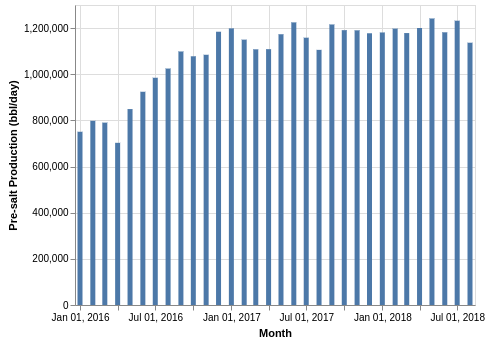

In [28]:
months = merged_df.columns.tolist()[:-4]
months = [x.replace('_', '-').replace('prod-', '') + '-01' for x in months]
month_production = []
for column in merged_df.iloc[:, :-4].columns:
    month_production.append(merged_df[column].sum())

plot_df = pd.DataFrame(columns=['Month', 'Pre-salt Production (bbl/day)'])
plot_df['Month'] = months
plot_df['Pre-salt Production (bbl/day)'] = month_production
chart = alt.Chart(plot_df).mark_bar().encode(
    x='Month:T',
    y='Pre-salt Production (bbl/day)'
).interactive()

chart

### Overall pre-salt production histogram by month

In [29]:
def Freedman_Diaconis_bins_row(df_row):
    """
    Compute the bins number according to Freedman-Diaconis h parameter
    """
    quartile_1 = df_row.quantile(0.25)
    quartile_3 = df_row.quantile(0.75)
    IQR = quartile_3 - quartile_1
    n = len(df_row)
    h = int(2 * IQR / (n ** (1. / 3.)))
    max_df_value = df_row.max()
    min_df_value = df_row.min()
    bins = int((max_df_value - min_df_value) / h) + 1
    bins = 8
    
    return bins

def hist_plot_by_month(period):
    target_df = merged_df.T.iloc[:-4,:].loc[period].copy()

    bins = Freedman_Diaconis_bins_row(target_df)
    plt.xlabel('Production (bbl/day)')
    target_df.plot.hist(bins=bins)

In [30]:
from ipywidgets import interact

months = [column for column in merged_df.iloc[:, :-4].columns]

interact(hist_plot_by_month, period=months)

interactive(children=(Dropdown(description='period', options=('prod_2016_01', 'prod_2016_02', 'prod_2016_03', …

<function __main__.hist_plot_by_month(period)>

### Plotting best wells ranked in terms of production in a given month

In [31]:
def bar_plot_by_month(period, rank_lim):
    best_wells_df = merged_df.iloc[:, :-4].sort_values(by=period, ascending=False)

    df_collection = {}
    for column in merged_df.iloc[:, :-4].columns:
        df_collection[column] = merged_df[column]

    plot_df = pd.DataFrame(columns=['Well', 'Production (bbl/day)'])
    plot_df['Production (bbl/day)'] = df_collection[period].sort_values(ascending=False)[:rank_lim]
    plot_df['Well'] = df_collection[period].sort_values(ascending=False)[:rank_lim].index.map(str.upper)
    plot_df.index = range(len(plot_df))

    sb.set()
    fig, ax = plt.subplots()
    bar_plot = sb.barplot(x=plot_df['Well'], y=plot_df['Production (bbl/day)'], ax=ax)
    bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90)
    Fig = bar_plot.get_figure()

In [32]:
from ipywidgets import interact, IntSlider

months = [column for column in merged_df.iloc[:, :-4].columns]

interact(bar_plot_by_month, period=months, rank_lim=IntSlider(min=5, max=20, value=10))

interactive(children=(Dropdown(description='period', options=('prod_2016_01', 'prod_2016_02', 'prod_2016_03', …

<function __main__.bar_plot_by_month(period, rank_lim)>

### How much dispersed is well production data? Box plot could tell to us!

In [33]:
def box_plot_by_month(period, rank_lim):
    target_df = merged_df.copy().sort_values(by=period, ascending=False).T.iloc[:-4,:rank_lim].replace({'0':np.nan, 0:np.nan}).copy()
    
    sb.set()
    fig, ax = plt.subplots()

    box_plot = sb.boxplot(
        palette=["m", "g"],
        data=target_df,
        orient='h',
        ax=ax
    )
    sb.despine(offset=10, trim=True)

In [34]:
from ipywidgets import interact, IntSlider

months = [column for column in merged_df.iloc[:, :-4].columns]

interact(box_plot_by_month, period=months, rank_lim=IntSlider(min=1, max=15, value=10))

interactive(children=(Dropdown(description='period', options=('prod_2016_01', 'prod_2016_02', 'prod_2016_03', …

<function __main__.box_plot_by_month(period, rank_lim)>

# Like presalt production, this is just the beginning...

* Do you like to contribute?

* Do you think it's interesting?

* Learned something new?

* If you say yes to any question above, we met our main objective!

# Thank you! Questions?

<p align="center">
  <img src=img/branding-tdc.png" width="400"/></p> 
                                      <img src=img/esss_2_pos_RGB.jpg" width="400"/></p>